In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
import corner
CurrentPath = os.getcwd()
data_3 = np.loadtxt(CurrentPath + '/Data/data_3.txt', delimiter=' ')
X = data_3.T[0];Y = data_3.T[1]; var = data_3.T[2]

In [16]:
import nestle

#define loglikelihood
def loglike_linear(theta):
    model = linear(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

#define models
def linear(x, theta):
    y= theta[0]*x + theta[1]
    return y
def cube(x,theta):
    y = theta[0]*x**3 + theta[1]*x**2 + theta[2]*x + theta[3]
    return y
def cubic2(x,theta):
    y = theta[0]/3*x**3 + theta[1]/3*x**2 + theta[2]/3*x + theta[3]/3
    return y
def quadratic(x,theta):
    y = theta[0]*x**2 + theta[1]*x + theta[2]
    return y
def exponential(x,theta):
    y = theta[0]*np.exp(theta[1]*x) + theta[2]
    return y
def powerlaw(x,theta):
    y = theta[0]*x**theta[1] + theta[2]
    return y
#define prior
def prior(x):
    theta = 100 * x - 50
    return theta

### Linear

niter: 12177
ncall: 20365
nsamples: 13177
logz: -2358.356 +/-  0.101
h: 10.302 
logzerr: 0.10149715520942341
Best-fit parameters: a = 38.849 +/- 0.189
Best-fit parameters: b = -13.643 +/- 0.261


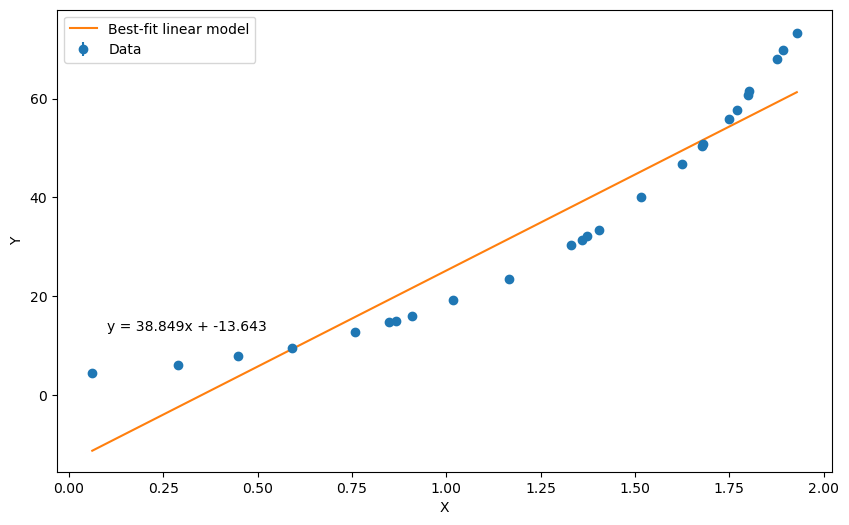

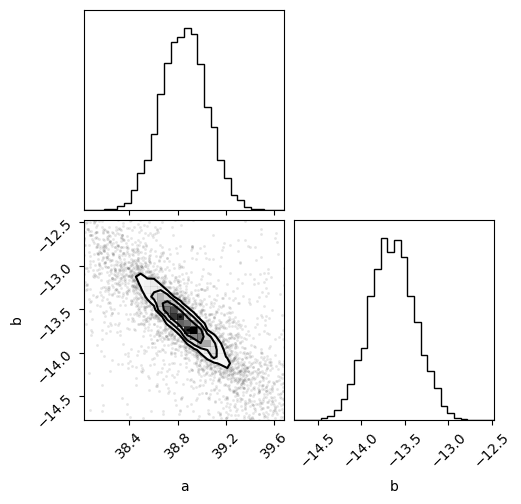

In [4]:
import matplotlib.pyplot as plt
import corner

"""
def prior(x):
    theta = np.array([3,2]) * x + np.array([13.091-1.5,2.7-1])
    return theta
"""
result_linear = nestle.sample(loglike_linear, prior, 2,npoints=1000, method='single')
print(result_linear.summary(), f"\nlogzerr: {result_linear.logzerr}")
p_linear, cov_linear = nestle.mean_and_cov(result_linear.samples, result_linear.weights)
print(f"Best-fit parameters: a = {p_linear[0]:.3f} +/- {np.sqrt(cov_linear[0,0]):.3f}")
print(f"Best-fit parameters: b = {p_linear[1]:.3f} +/- {np.sqrt(cov_linear[1,1]):.3f}")

plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, linear(X, p_linear), label='Best-fit linear model')
plt.text(0.1,13, f"y = {p_linear[0]:.3f}x + {p_linear[1]:.3f}")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
fig = corner.corner(result_linear.samples,weights=result_linear.weights, labels=['a', 'b'],
                    range=[0.99999, 0.99999], bins=30)
plt.show()

### quadratic

niter: 16996
ncall: 29148
nsamples: 17996
logz: -144.547 +/-  0.121
h: 14.695 
logzerr: 0.1212232733913131
Best-fit parameters: 24.687 +/- 0.374
Best-fit parameters: -15.482 +/- 0.843
Best-fit parameters: 8.481 +/- 0.422


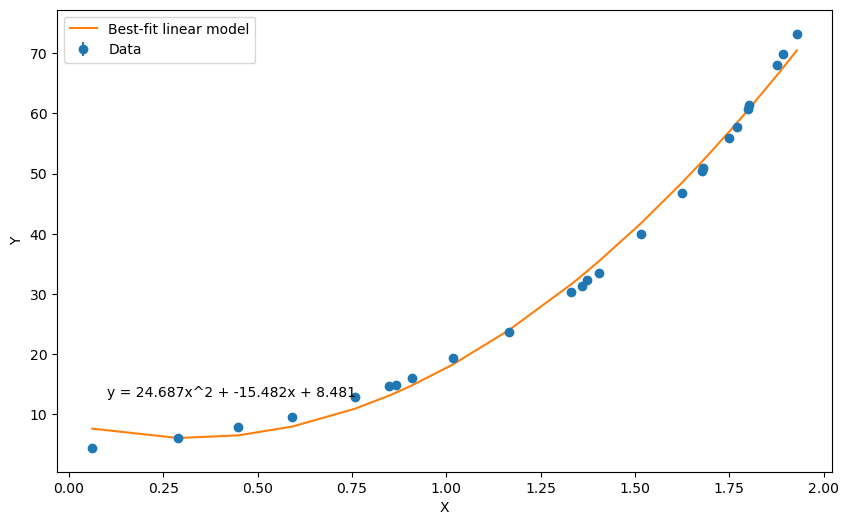

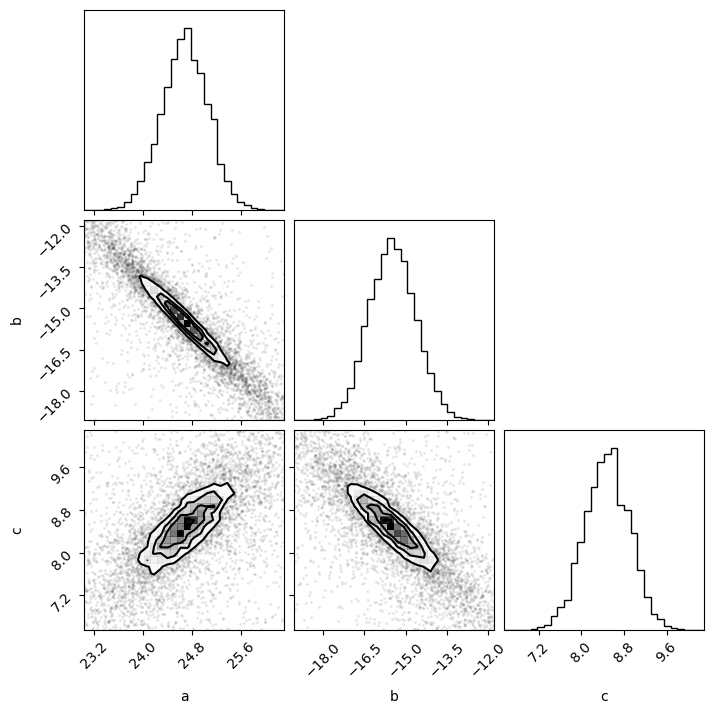

In [5]:
def loglike_quadratic(theta):
    model = quadratic(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_quadratic = nestle.sample(loglike_quadratic, prior, 3,npoints=1000, method='single')
print(result_quadratic.summary(), f"\nlogzerr: {result_quadratic.logzerr}")
p_quadratic, cov_quadratic = nestle.mean_and_cov(result_quadratic.samples, result_quadratic.weights)
print(f"Best-fit parameters: {p_quadratic[0]:.3f} +/- {np.sqrt(cov_quadratic[0,0]):.3f}")
print(f"Best-fit parameters: {p_quadratic[1]:.3f} +/- {np.sqrt(cov_quadratic[1,1]):.3f}")
print(f"Best-fit parameters: {p_quadratic[2]:.3f} +/- {np.sqrt(cov_quadratic[2,2]):.3f}")

plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, quadratic(X, p_quadratic), label='Best-fit linear model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_quadratic[0]:.3f}x^2 + {p_quadratic[1]:.3f}x + {p_quadratic[2]:.3f}")
plt.legend()
fig = corner.corner(result_quadratic.samples,weights=result_quadratic.weights, labels=['a', 'b','c'],
                    range=[0.99999, 0.99999,0.99999], bins=30)
plt.show()

### Cubic

niter: 20806
ncall: 39748
nsamples: 21806
logz: -27.973 +/-  0.134
h: 18.019 
logzerr: 0.134233164443628
Best-fit parameters: 11.527 +/- 0.758
Best-fit parameters: -10.946 +/- 2.375
Best-fit parameters: 14.501 +/- 2.148
Best-fit parameters: 3.010 +/- 0.560


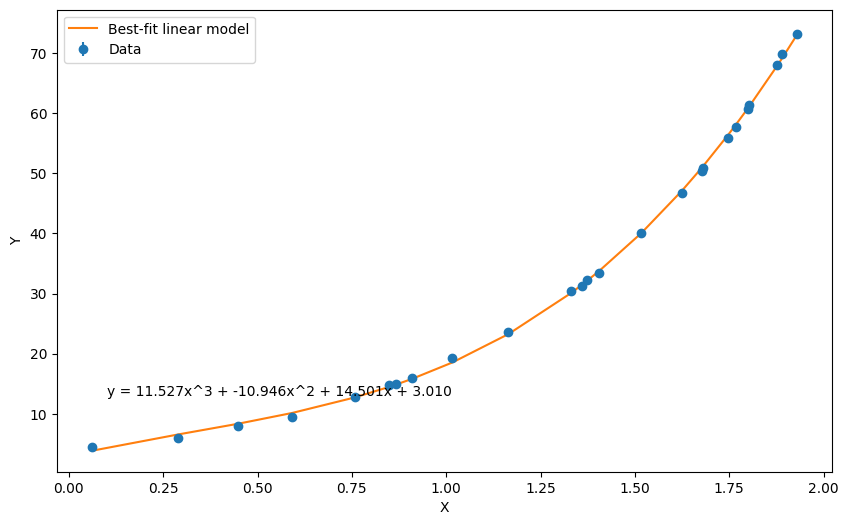

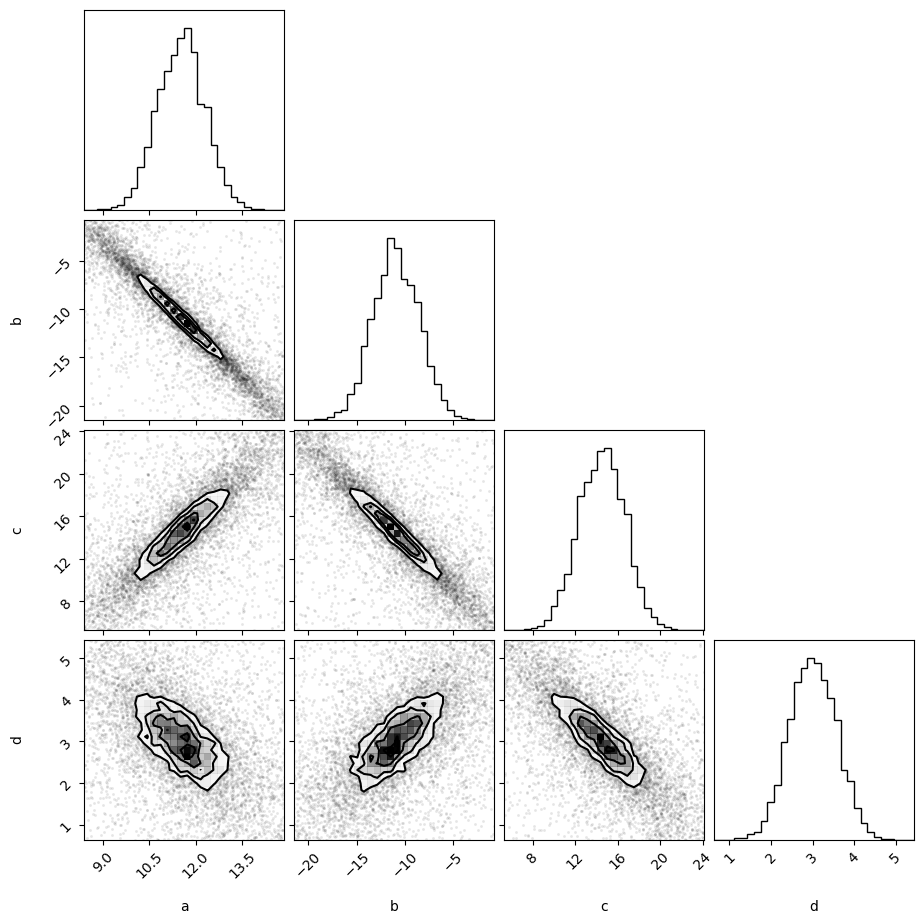

In [13]:
def loglike_cube(theta):
    model = cube(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_cube = nestle.sample(loglike_cube, prior, 4,npoints=1000, method='single')
print(result_cube.summary(), f"\nlogzerr: {result_cube.logzerr}")
p_cube, cov_cube = nestle.mean_and_cov(result_cube.samples, result_cube.weights)
print(f"Best-fit parameters: {p_cube[0]:.3f} +/- {np.sqrt(cov_cube[0,0]):.3f}")
print(f"Best-fit parameters: {p_cube[1]:.3f} +/- {np.sqrt(cov_cube[1,1]):.3f}")
print(f"Best-fit parameters: {p_cube[2]:.3f} +/- {np.sqrt(cov_cube[2,2]):.3f}")
print(f"Best-fit parameters: {p_cube[3]:.3f} +/- {np.sqrt(cov_cube[3,3]):.3f}")



plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, cube(X, p_cube), label='Best-fit linear model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_cube[0]:.3f}x^3 + {p_cube[1]:.3f}x^2 + {p_cube[2]:.3f}x + {p_cube[3]:.3f}")
plt.legend()

fig = corner.corner(result_cube.samples,weights=result_cube.weights, labels=['a', 'b','c','d'],
                    range=[0.99999, 0.99999,0.99999,0.99999], bins=30)
plt.show()

niter: 16370
ncall: 36730
nsamples: 17370
logz: -23.525 +/-  0.118
h: 13.839 
logzerr: 0.11763935438596304
Best-fit parameters: 34.091 +/- 1.839
Best-fit parameters: -31.158 +/- 5.617
Best-fit parameters: 41.854 +/- 4.983
Best-fit parameters: 9.431 +/- 1.381


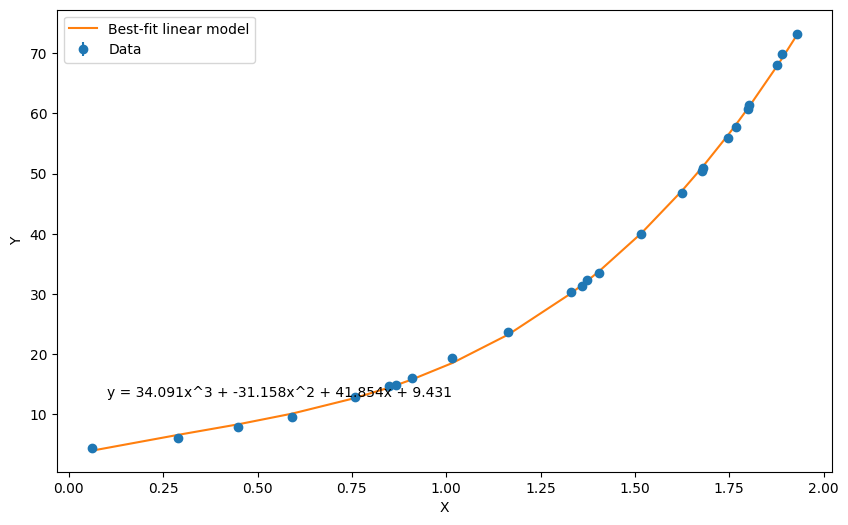

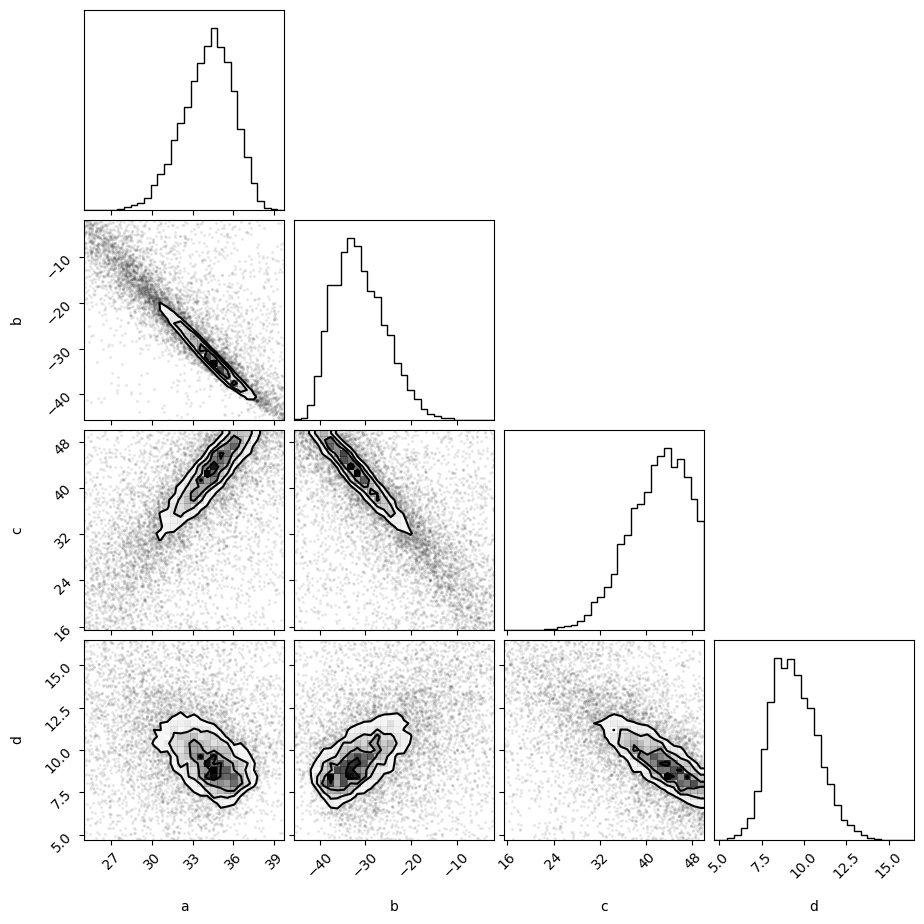

In [17]:
def loglike_cube2(theta):
    model = cubic2(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_cube = nestle.sample(loglike_cube2, prior, 4,npoints=1000, method='single')
print(result_cube.summary(), f"\nlogzerr: {result_cube.logzerr}")
p_cube, cov_cube = nestle.mean_and_cov(result_cube.samples, result_cube.weights)
print(f"Best-fit parameters: {p_cube[0]:.3f} +/- {np.sqrt(cov_cube[0,0]):.3f}")
print(f"Best-fit parameters: {p_cube[1]:.3f} +/- {np.sqrt(cov_cube[1,1]):.3f}")
print(f"Best-fit parameters: {p_cube[2]:.3f} +/- {np.sqrt(cov_cube[2,2]):.3f}")
print(f"Best-fit parameters: {p_cube[3]:.3f} +/- {np.sqrt(cov_cube[3,3]):.3f}")



plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, cubic2(X, p_cube), label='Best-fit linear model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_cube[0]:.3f}x^3 + {p_cube[1]:.3f}x^2 + {p_cube[2]:.3f}x + {p_cube[3]:.3f}")
plt.legend()

fig = corner.corner(result_cube.samples,weights=result_cube.weights, labels=['a', 'b','c','d'],
                    range=[0.99999, 0.99999,0.99999,0.99999], bins=30)
plt.show()

### Exponential

niter: 22018
ncall: 926396
nsamples: 23018
logz: -23.853 +/-  0.140
h: 19.682 
logzerr: 0.1402915702619459
Best-fit parameters: 4.331 +/- 0.231
Best-fit parameters: 1.472 +/- 0.026
Best-fit parameters: -0.456 +/- 0.505


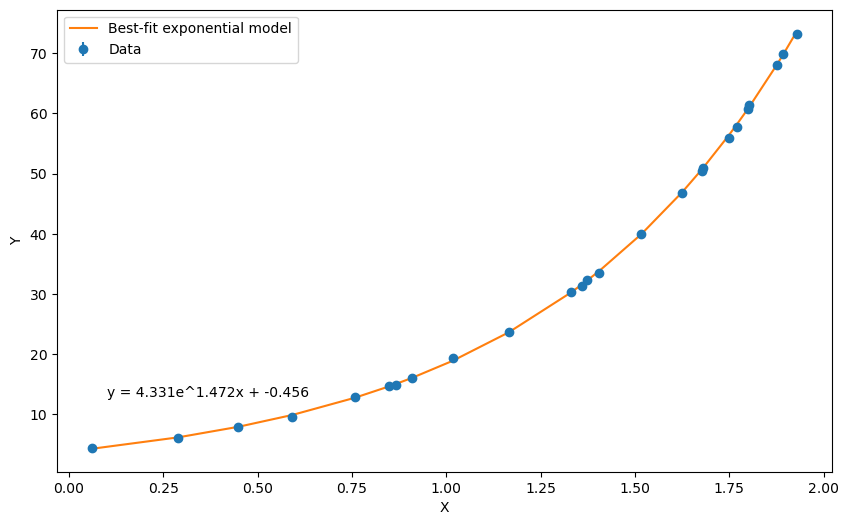

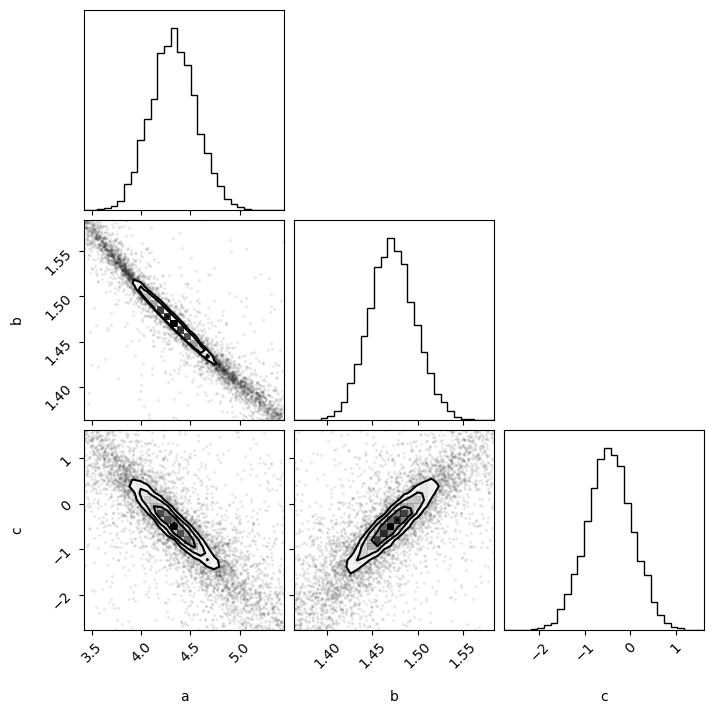

In [10]:
def loglike_exponential(theta):
    model = exponential(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_exponential = nestle.sample(loglike_exponential, prior, 3,npoints=1000, method='single')
print(result_exponential.summary(), f"\nlogzerr: {result_exponential.logzerr}")
p_exponential, cov_exponential = nestle.mean_and_cov(result_exponential.samples, result_exponential.weights)
print(f"Best-fit parameters: {p_exponential[0]:.3f} +/- {np.sqrt(cov_exponential[0,0]):.3f}")
print(f"Best-fit parameters: {p_exponential[1]:.3f} +/- {np.sqrt(cov_exponential[1,1]):.3f}")
print(f"Best-fit parameters: {p_exponential[2]:.3f} +/- {np.sqrt(cov_exponential[2,2]):.3f}")



plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, exponential(X, p_exponential), label='Best-fit exponential model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_exponential[0]:.3f}e^{p_exponential[1]:.3f}x + {p_exponential[2]:.3f}")
plt.legend()

fig = corner.corner(result_exponential.samples,weights=result_exponential.weights, labels=['a', 'b','c'],
                    range=[0.99999, 0.99999,0.99999], bins=30)
plt.show()


In [9]:
result_exponential

   niter: 21888
   ncall: 935126
    logz: -23.71545708530809
 logzerr: 0.14010175089849086
       h: 19.628500604822783
 samples: array([[ 27.60140477,  49.83617164,  49.12516655],
       [-31.2547868 ,  49.70926251,  -8.42845434],
       [ 16.9401087 ,  49.98350283,  29.30334655],
       ...,
       [  4.48615606,   1.45286217,  -0.68194567],
       [  4.27787985,   1.47913469,  -0.4564929 ],
       [  4.26468492,   1.47745776,  -0.3397202 ]])
 weights: array([0.        , 0.        , 0.        , ..., 0.00024924, 0.00030866,
       0.00026264])
  logvol: array([ -6.90825524,  -6.90925524,  -6.91025524, ..., -28.79575528,
       -28.79575528, -28.79575528])
    logl: array([-4.81128043e+86, -3.78228949e+86, -3.19816143e+86, ...,
       -3.21678918e+00, -3.00296729e+00, -3.16441743e+00])

### Power law

niter: 20182
ncall: 266005
nsamples: 21182
logz: -58.550 +/-  0.134
h: 17.910 
logzerr: 0.13382859712904213
Best-fit parameters: 10.819 +/- 0.271
Best-fit parameters: 2.742 +/- 0.037
Best-fit parameters: 6.701 +/- 0.257


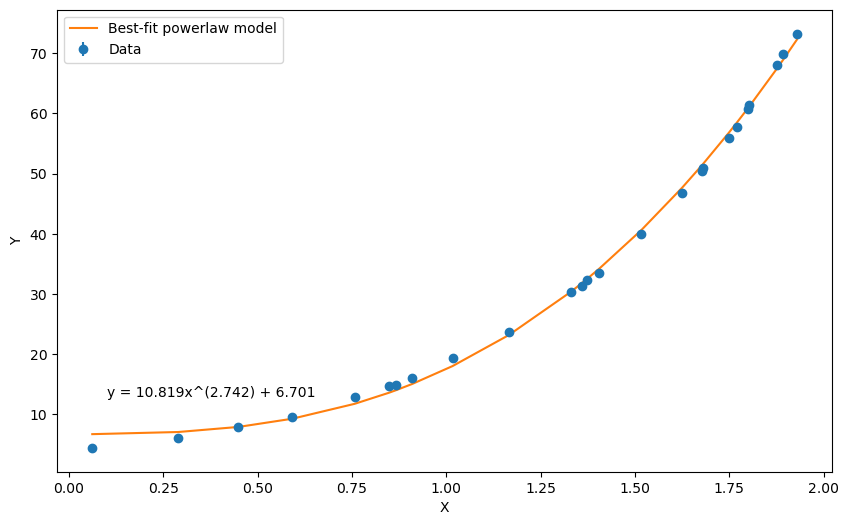

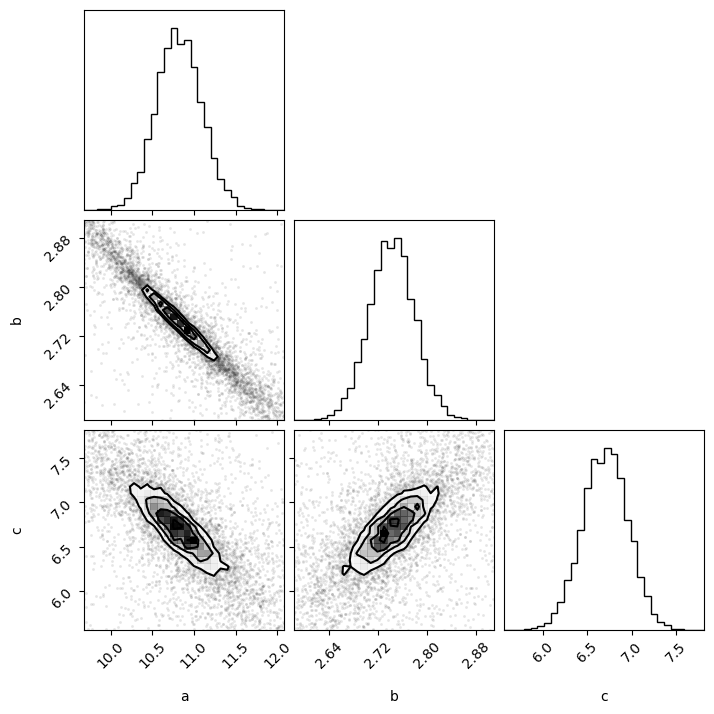

In [8]:
def loglike_powerlaw(theta):
    model = powerlaw(X,theta) # Change the model here
    loglikelihood = -0.5*np.sum((Y-model)**2/var)
    return(loglikelihood)

result_powerlaw = nestle.sample(loglike_powerlaw, prior, 3,npoints=1000, method='single')
print(result_powerlaw.summary(), f"\nlogzerr: {result_powerlaw.logzerr}")
p_powerlaw, cov_powerlaw = nestle.mean_and_cov(result_powerlaw.samples, result_powerlaw.weights)
print(f"Best-fit parameters: {p_powerlaw[0]:.3f} +/- {np.sqrt(cov_powerlaw[0,0]):.3f}")
print(f"Best-fit parameters: {p_powerlaw[1]:.3f} +/- {np.sqrt(cov_powerlaw[1,1]):.3f}")
print(f"Best-fit parameters: {p_powerlaw[2]:.3f} +/- {np.sqrt(cov_powerlaw[2,2]):.3f}")


plt.figure(figsize=(10, 6))
plt.errorbar(X, Y, np.sqrt(var), fmt='o', label='Data')
plt.plot(X, powerlaw(X, p_powerlaw), label='Best-fit powerlaw model')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.1,13, f"y = {p_powerlaw[0]:.3f}x^({p_powerlaw[1]:.3f}) + {p_powerlaw[2]:.3f}")
plt.legend()

fig = corner.corner(result_powerlaw.samples,weights=result_powerlaw.weights, labels=['a', 'b','c'],
                    range=[0.99999, 0.99999,0.99999], bins=30)
plt.show()